# 宿題1

In [76]:
import numpy as np
import scipy as sp
from numpy.random import randn, rand
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

## 逆関数法による乱数生成

In [53]:
def myrand(n=5000):
    x = np.zeros(n)
    u = rand(n)
    flag = (0 <= u) * (u < 1/8)
    x[flag] = np.sqrt(8*u[flag])
    flag = (1/8 <= u) * (u < 1/4)
    x[flag] = 2 - np.sqrt(2 - 8*u[flag])
    flag = (1/4 <= u) * (u < 1/2)
    x[flag] = 1 + 4*u[flag]
    flag = (1/2 <= u) * (u < 3/4)
    x[flag] = 3 + np.sqrt(4*u[flag] - 2)
    flag = (3/4 <= u) * (u <= 1)
    x[flag] = 5 - np.sqrt(4 - 4*u[flag])
    return x

In [37]:
np.zeros((1,3))

array([[ 0.,  0.,  0.]])

In [54]:
x = myrand()

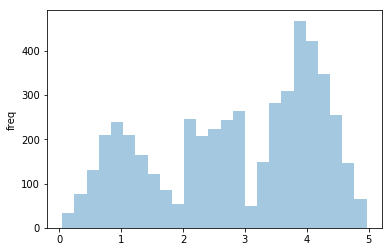

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('freq')
sns.distplot(x, kde=False, rug=False, bins=25)
None

In [7]:
rand(1,5)

array([[ 0.7736542 ,  0.78195198,  0.63769635,  0.1331327 ,  0.73824821]])

In [8]:
test = np.array([1,2,3])

In [9]:
test < 1.5

array([ True, False, False], dtype=bool)

In [10]:
flag = test < 1.5

In [11]:
flag

array([ True, False, False], dtype=bool)

In [14]:
test[flag] = 100

In [15]:
test

array([100,   2,   3])

In [16]:
test[flag]

array([100])

In [25]:
test

array([100,   2,   3])

In [35]:
(test < 3) * (test > 1)

array([False,  True, False], dtype=bool)

## ガウスカーネル密度推定法

In [78]:
np.random.seed(1)
sample = myrand()

In [102]:
def gkernel_est(sample, x=np.linspace(0, 5, 501), bandwidth=0.1):
    pxh = np.zeros_like(x)
    n = sample.shape[0]
    for i in range(n):
        pxh = pxh + norm.pdf(x, loc=sample[i], scale=bandwidth)
    return x, pxh

In [64]:
sp.random.normal(loc=1, scale=4, size=3000).var()

16.147287356410022

In [65]:
sp.random.normal(loc=1, scale=4, size=3000).mean()

1.0315004246587389

In [67]:
test = np.array([-1,0,1])
sp.random.normal(test)

array([-1.28865148,  0.82153081,  0.10158852])

In [68]:
from scipy.stats import norm

In [75]:
norm.pdf(test, loc=0, scale=1)

array([ 0.24197072,  0.39894228,  0.24197072])

In [103]:
x, pxh = gkernel_est(sample=sample)

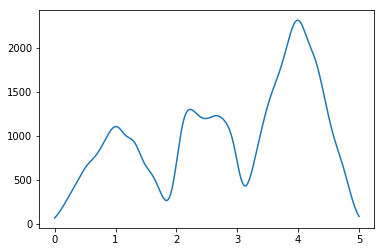

In [104]:
plt.plot(x, pxh)
plt.show()

## 尤度交差確認

In [131]:
def cross_validation(sample, n_split=5, params=[0.01, 0.1, 0.5]):
    n_params = len(params)
    likelihoods = np.zeros(n_params)
    group = np.split(sample, n_split)
    for j in range(n_params):
        for i in range(n_split):
            if i==0:
                sample_temp = np.hstack(group[i+1:][0])
            elif i==n_split-1:
                sample_temp = np.hstack(group[0:i])
            else:
                sample_temp = np.hstack([np.hstack(group[0:i]), group[i+1:][0]])
            _, pxh = gkernel_est(sample_temp, group[i], bandwidth=params[j])
            likelihoods[j] += np.sum(np.log(pxh))
    opt_param = params[np.argmax(likelihoods)]
    print(likelihoods)
    return opt_param

In [108]:
test = np.arange(10)

In [109]:
test

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
len(test)

10

In [111]:
np.split(test, 5)

[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]

In [112]:
group = np.split(test, 5)

In [113]:
group[0:3]

[array([0, 1]), array([2, 3]), array([4, 5])]

In [114]:
group[4:]

[array([8, 9])]

In [119]:
group[5:]

[]

In [121]:
np.hstack(group[1:])

array([2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
np.hstack([np.hstack(group[0:3]), group[4:]])

ValueError: all the input arrays must have same number of dimensions

In [115]:
[np.hstack(group[0:3]), group[4:][0]]

[array([0, 1, 2, 3, 4, 5]), array([8, 9])]

In [116]:
group[4:].shape

AttributeError: 'list' object has no attribute 'shape'

In [117]:
np.hstack([np.hstack(group[0:3]), group[4:][0]])

array([0, 1, 2, 3, 4, 5, 8, 9])

In [133]:
np.random.seed(5)
sample = myrand()
cross_validation(sample=sample)

[ 31878.54627759  31982.65881453  31385.17449453]


0.1

## まとめ

In [1]:
import numpy as np
import scipy as sp
from numpy.random import randn, rand
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

In [2]:
def myrand(n=5000):
    x = np.zeros(n)
    u = rand(n)
    flag = (0 <= u) * (u < 1/8)
    x[flag] = np.sqrt(8*u[flag])
    flag = (1/8 <= u) * (u < 1/4)
    x[flag] = 2 - np.sqrt(2 - 8*u[flag])
    flag = (1/4 <= u) * (u < 1/2)
    x[flag] = 1 + 4*u[flag]
    flag = (1/2 <= u) * (u < 3/4)
    x[flag] = 3 + np.sqrt(4*u[flag] - 2)
    flag = (3/4 <= u) * (u <= 1)
    x[flag] = 5 - np.sqrt(4 - 4*u[flag])
    return x

In [3]:
def gkernel_est(sample, x=np.linspace(0, 5, 501), bandwidth=0.1):
    pxh = np.zeros_like(x)
    n = sample.shape[0]
    for i in range(n):
        pxh = pxh + norm.pdf(x, loc=sample[i], scale=bandwidth)
    return x, pxh

In [4]:
def cross_validation(sample, n_split=5, params=[0.01, 0.1, 0.5]):
    n_params = len(params)
    likelihoods = np.zeros(n_params)
    group = np.split(sample, n_split)
    for j in range(n_params):
        for i in range(n_split):
            if i==0:
                sample_temp = np.hstack(group[i+1:][0])
            elif i==n_split-1:
                sample_temp = np.hstack(group[0:i])
            else:
                sample_temp = np.hstack([np.hstack(group[0:i]), group[i+1:][0]])
            _, pxh = gkernel_est(sample_temp, group[i], bandwidth=params[j])
            likelihoods[j] += np.sum(np.log(pxh))
    opt_param = params[np.argmax(likelihoods)]
    print(likelihoods)
    return opt_param

In [5]:
np.random.seed(1)
sample = myrand()
opt_b = cross_validation(sample=sample)
x, pxh = gkernel_est(sample=sample, bandwidth=opt_b)

[ 31799.68278059  31908.0469855   31338.88049783]


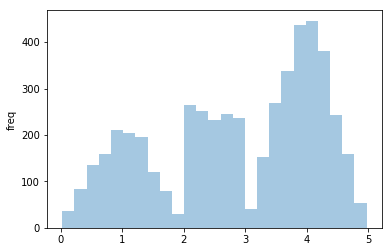

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_ylabel('freq')
sns.distplot(sample, kde=False, rug=False, bins=25)
None

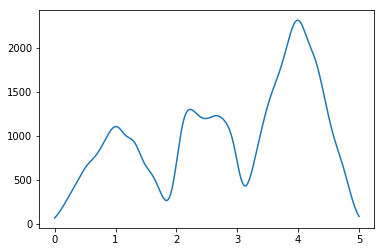

In [7]:
plt.plot(x, pxh)
plt.show()